In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_df.csv')

In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.10,2.0,102.0,-1.00,-1.0,1
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,-1.0,109.0,0.91,120.0,1
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,-1.00,-1.0,1
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1


In [4]:
df['age_group'] = pd.cut(df['age'], bins=[0,30,40,50,60,70,100])

(array([618., 529., 479., 660., 696., 788.]),
 array([  0.,  30.,  40.,  50.,  60.,  70., 100.]),
 <BarContainer object of 6 artists>)

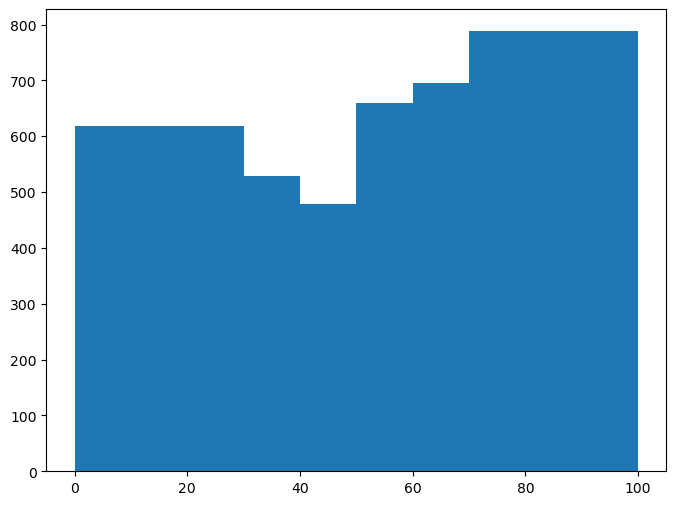

In [5]:
plt.figure(figsize=(8,6))
plt.hist(df['age'], bins = [0,30,40,50,60,70,100])

<Figure size 1000x400 with 0 Axes>

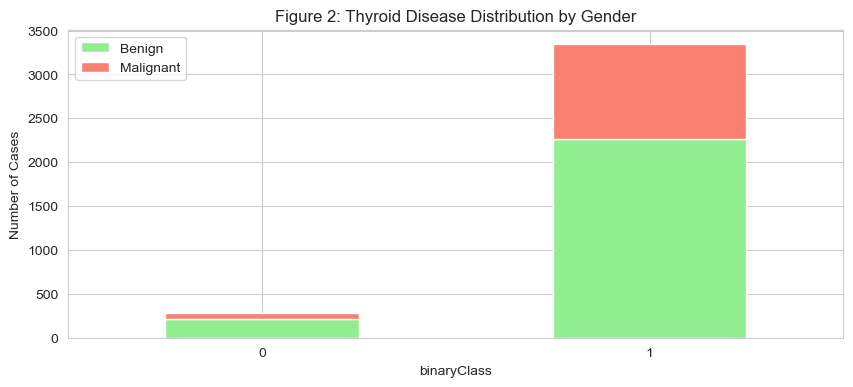

C:\Users\Anshul\AppData\Local\Temp\ipykernel_19976\2926076649.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df.groupby('age_group')['binaryClass'].agg(['count','mean'])


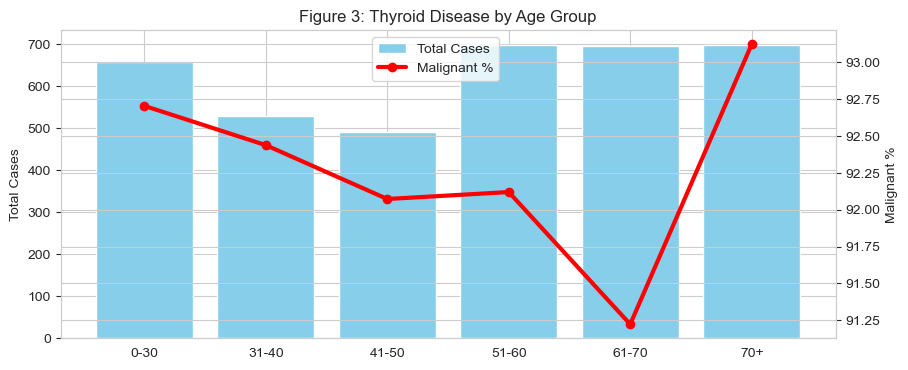

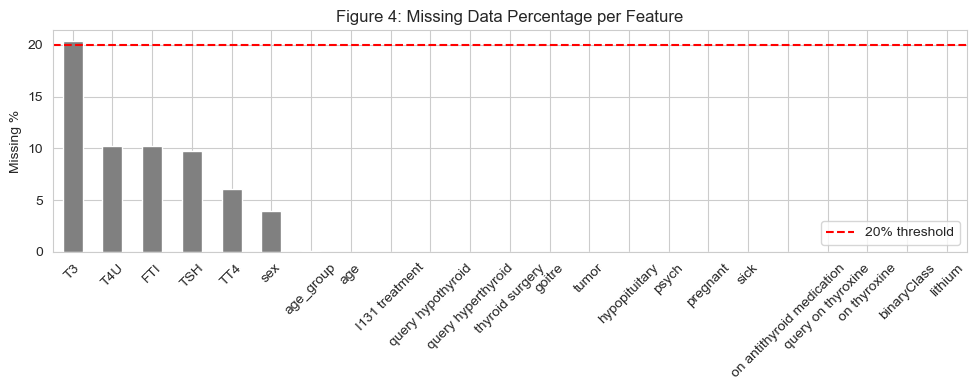

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)

# 1. Gender distribution + benign/malignant (like paper Figure 2)
plt.figure()
df_temp = pd.crosstab(df['sex'], df['binaryClass']).T
df_temp.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Figure 2: Thyroid Disease Distribution by Gender')
plt.ylabel('Number of Cases')
plt.legend(['Benign', 'Malignant'])
plt.xticks(rotation=0)
plt.savefig('Cases_distribution.png')
plt.show()

# 2. Age group distribution + malignant % (like paper Figure 3)
df['age_group'] = pd.cut(df['age'], bins=[0,30,40,50,60,70,150], labels=['0-30','31-40','41-50','51-60','61-70','70+'])
age_dist = df.groupby('age_group')['binaryClass'].agg(['count','mean'])
age_dist['mean'] *= 100

fig, ax1 = plt.subplots()
ax1.bar(age_dist.index, age_dist['count'], color='skyblue', label='Total Cases')
ax2 = ax1.twinx()
ax2.plot(age_dist.index, age_dist['mean'], color='red', marker='o', linewidth=3, label='Malignant %')
ax1.set_ylabel('Total Cases'); ax2.set_ylabel('Malignant %')
ax1.set_title('Figure 3: Thyroid Disease by Age Group')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.88))
plt.savefig('Age_distribution.png')
plt.show()

# 3. Missing % per feature (like paper Figure 4)
missing = df.isnull().mean().sort_values(ascending=False) * 100
plt.figure()
missing.plot(kind='bar', color='gray')
plt.title('Figure 4: Missing Data Percentage per Feature')
plt.ylabel('Missing %')
plt.xticks(rotation=45)
plt.axhline(20, color='red', linestyle='--', label='20% threshold')
plt.legend()
plt.tight_layout()
plt.savefig('missing_percentage.png')
plt.show()

## Analysing missing ratios

In [11]:
columns=df.columns
for col in columns:
    df[col] = df[col].replace(-1, np.nan)

In [12]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass,age_group
0,41.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,1,"(40, 50]"
1,23.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.10,2.0,102.0,NaN,NaN,1,"(0, 30]"
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109.0,0.91,120.0,1,"(40, 50]"
3,70.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175.0,NaN,NaN,1,"(60, 70]"
4,70.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,1,"(60, 70]"


In [13]:
missing_pct = (df.isnull().sum()/len(df)) * 100

In [14]:
missing_pct

age                           0.026511
sex                           3.976670
on thyroxine                  0.000000
query on thyroxine            0.000000
on antithyroid medication     0.000000
sick                          0.000000
pregnant                      0.000000
thyroid surgery               0.000000
I131 treatment                0.000000
query hypothyroid             0.000000
query hyperthyroid            0.000000
lithium                       0.000000
goitre                        0.000000
tumor                         0.000000
hypopituitary                 0.000000
psych                         0.000000
TSH                           9.782609
T3                           20.387063
TT4                           6.124072
T4U                          10.259809
FTI                          10.206787
binaryClass                   0.000000
age_group                     0.053022
dtype: float64

## Batch Conditioning

In [15]:
X = df.drop('binaryClass', axis = 1).copy()
y = df['binaryClass'].values

In [16]:
import numpy as np
import pandas as pd

# Assume your dataframe is called 'df' and target column is 'target' (0=benign, 1=malignant)
X = df.drop('binaryClass', axis=1).copy()
y = df['binaryClass'].values

# Replace any remaining '?' with NaN if still there
X = X.replace('?', np.nan)

# FIX: Handle categorical/object columns by mapping to numeric codes
for col in X.select_dtypes(include=['category', 'object']).columns:
    X[col] = pd.Categorical(X[col]).codes.astype(float)  # NaN becomes -1, strings to 0/1/etc.

X = X.astype(float)

def compute_conditioning(X, batch_size=2):
    n_samples, n_features = X.shape
    mini_conditions = []
    whole_conditions = []

    for col_idx in range(n_features):
        col = X.iloc[:, col_idx].values  # Now safe: numeric array
        
        # ---- Whole-batch conditioning (Algorithm 2) ----
        valid = ~np.isnan(col)
        if valid.sum() < 2:
            whole_cond = np.inf
        else:
            x_valid = np.abs(col[valid])
            ones = np.ones_like(x_valid)
            B_whole = np.column_stack([ones, x_valid])           
            try:
                BtB = B_whole.T @ B_whole
                eigenvalues = np.linalg.eigvals(BtB)
                eigenvalues = eigenvalues[np.abs(eigenvalues) > 1e-10]  # Filter near-zero
                if len(eigenvalues) < 2:
                    cond_whole = np.inf
                else:
                    cond_whole = np.max(np.abs(eigenvalues)) / np.min(np.abs(eigenvalues))
            except:
                cond_whole = np.inf
        whole_conditions.append(cond_whole)

        # ---- Mini-batch conditioning (Algorithm 1) ----
        conds_mini = []
        i = 0
        while i + batch_size <= n_samples:
            batch = col[i:i+batch_size]
            nan_mask = ~np.isnan(batch)
            if np.sum(nan_mask) < 2:  # Need at least 2 valid points
                i += batch_size
                continue
            x_batch = np.abs(batch[nan_mask])
            ones = np.ones_like(x_batch)
            B = np.column_stack([ones, x_batch])
            try:
                BtB = B.T @ B
                eigenvalues = np.linalg.eigvals(BtB)
                eigenvalues = eigenvalues[np.abs(eigenvalues) > 1e-10]
                if len(eigenvalues) < 2:
                    cond = np.inf
                else:
                    cond = np.max(np.abs(eigenvalues)) / np.min(np.abs(eigenvalues))
                conds_mini.append(cond)
            except:
                conds_mini.append(np.inf)
            i += batch_size
        
        mini_conditions.append(np.mean(conds_mini) if conds_mini else np.inf)

    return np.array(mini_conditions), np.array(whole_conditions)

# Run it
mini_cond, whole_cond = compute_conditioning(X, batch_size=2)

# Show results like the paper (Figures 5 & 6)
result = pd.DataFrame({
    'Feature': X.columns,
    'Missing %': (X.isnull().sum() / len(X) * 100).round(3),
    'Mini-batch Condition': np.log10(np.maximum(mini_cond, 1)).round(2),  # Log10 for readability like paper
    'Whole-batch Condition': np.log10(np.maximum(whole_cond, 1)).round(2)
}).sort_values('Mini-batch Condition', ascending=False)

print(result)

                                             Feature  Missing %  \
age                                              age      0.027   
sex                                              sex      3.977   
FTI                                              FTI     10.207   
T4U                                              T4U     10.260   
TT4                                              TT4      6.124   
T3                                                T3     20.387   
TSH                                              TSH      9.783   
psych                                          psych      0.000   
hypopituitary                          hypopituitary      0.000   
tumor                                          tumor      0.000   
goitre                                        goitre      0.000   
lithium                                      lithium      0.000   
query hyperthyroid                query hyperthyroid      0.000   
query hypothyroid                  query hypothyroid      0.00

## Dimensionality reduction

In [17]:
#Target correlation
target_corr = X.corrwith(pd.Series(y, name='target')).abs().sort_values(ascending=False)

#Inner similarity
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [col for col in upper.columns if any(upper[col]>0.85)]

X_reduced = X.drop(high_corr_pairs, axis=1)

#keeping only top 12-15 most target-informative features
selected_features = target_corr.drop(high_corr_pairs, errors='ignore').head(15).index
X_reduced = X_reduced[selected_features]

print("Reduced from", X.shape[1], "->", X_reduced.shape[1],"features")
print(selected_features.tolist())


Reduced from 22 -> 15 features
['TSH', 'FTI', 'TT4', 'T3', 'query hypothyroid', 'on thyroxine', 'sex', 'pregnant', 'T4U', 'psych', 'goitre', 'on antithyroid medication', 'thyroid surgery', 'query hyperthyroid', 'query on thyroxine']


In [18]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

Z = linkage(X_reduced.fillna(X_reduced.median()), 'ward')
clusters = fcluster(Z, t=150, criterion='maxclust')   # adjust 150 → 200–400 samples

X_final = X_reduced.groupby(clusters).mean()
y_final = pd.Series(y).groupby(clusters).first()

print("Reduced from", len(y), "→", len(y_final), "samples")

Reduced from 3772 → 150 samples


In [19]:
X_final['label'] = y_final

In [20]:
X_final.to_excel('merged_df.xlsx', index=False)

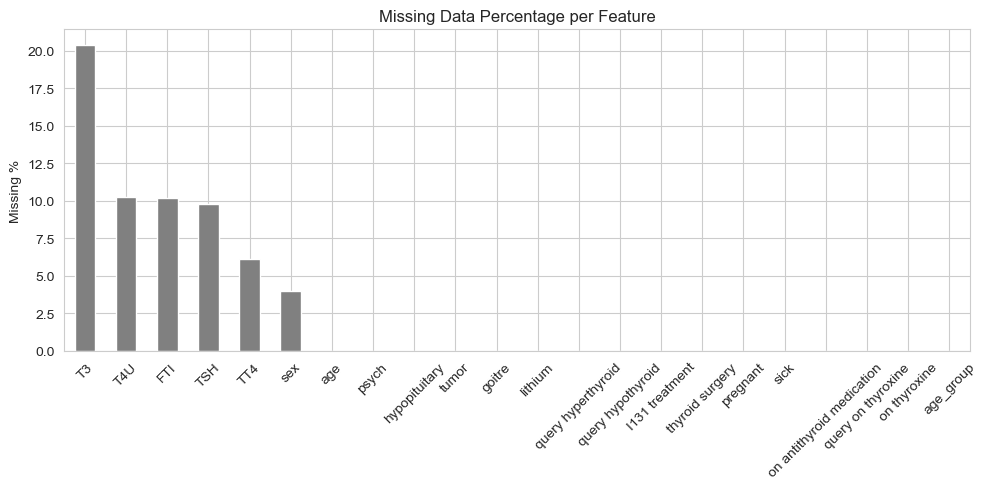

C:\Users\Anshul\AppData\Local\Temp\ipykernel_27768\408650687.py:36: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Anshul\AppData\Local\Temp\ipykernel_27768\408650687.py:36: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Anshul\AppData\Local\Temp\ipykernel_27768\408650687.py:37: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('conditioning_comparison.png', dpi=300)
C:\Users\Anshul\AppData\Local\Temp\ipykernel_27768\408650687.py:37: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.savefig('conditioning_comparison.png', dpi=300)
D:\Anaconda\envs\aml2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\envs\aml2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SU

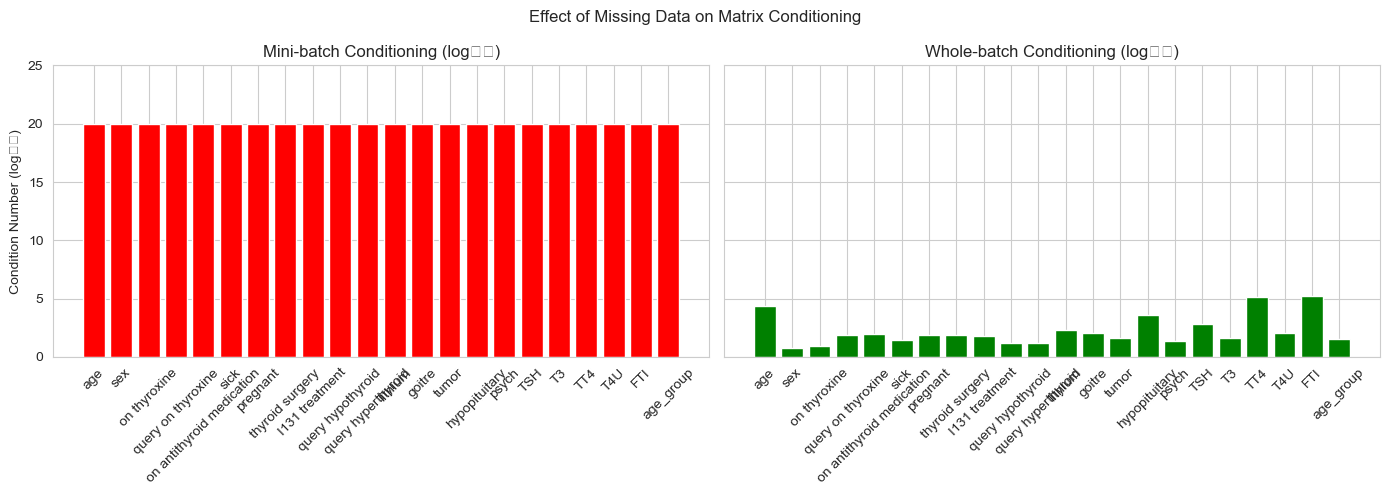

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# 1. Missing percentage per feature – sorted (like paper's Figure 4a)
missing_pct = X.isnull().mean() * 100
missing_pct_sorted = missing_pct.sort_values(ascending=False)

plt.figure(figsize=(10,5))
missing_pct_sorted.plot(kind='bar', color='gray')
plt.title('Missing Data Percentage per Feature')
plt.ylabel('Missing %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('missing_percentage.png', dpi=300)
plt.show()

# 2. Mini-batch condition numbers (all inf → show as huge bar)
# 3. Whole-batch condition numbers (real values)
mini_log = [20 if x == np.inf else np.log10(x) for x in mini_cond]  # inf → 10²⁰
whole_log = [np.log10(x) if x != np.inf else 0 for x in whole_cond]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharey=True)

ax1.bar(X.columns, mini_log, color='red')
ax1.set_title('Mini-batch Conditioning (log₁₀)')
ax1.set_ylabel('Condition Number (log₁₀)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 25)

ax2.bar(X.columns, whole_log, color='green')
ax2.set_title('Whole-batch Conditioning (log₁₀)')
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('Effect of Missing Data on Matrix Conditioning')
plt.tight_layout()
plt.savefig('conditioning_comparison.png', dpi=300)
plt.show()

Table 3: Poor Conditioning Analysis (Top 3 Features)
Feature  Missing (%)  Mini-batch Cond. (log10)  Whole-batch Cond. (log10)
     T3        20.39                      20.0                       1.66
    T4U        10.26                      20.0                       2.02
    FTI        10.21                      20.0                       5.21


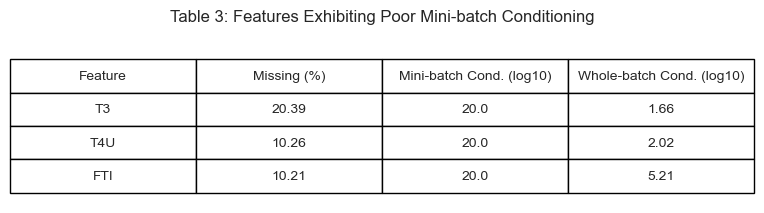

In [22]:
# Create Table 3 exactly like the paper
table3 = pd.DataFrame({
    'Feature': X.columns,
    'Missing (%)': (X.isnull().mean() * 100).round(2),
    'Mini-batch Cond. (log10)': [20.00 if x == np.inf else np.log10(x).round(2) for x in mini_cond],
    'Whole-batch Cond. (log10)': [np.log10(x).round(2) if x != np.inf else 0 for x in whole_cond]
})

# Sort by missing % descending, then pick top 3 worst (like paper)
table3_sorted = table3.sort_values(['Missing (%)', 'Mini-batch Cond. (log10)'], ascending=False)

# Select only top 3 worst features
final_table = table3_sorted.head(3).reset_index(drop=True)

# Display nicely
print("Table 3: Poor Conditioning Analysis (Top 3 Features)")
print(final_table.to_string(index=False))

# Optional: save as image for paper
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=final_table.values,
                 colLabels=final_table.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
plt.title('Table 3: Features Exhibiting Poor Mini-batch Conditioning', pad=20)
plt.savefig('Table3_poor_conditioning.png', dpi=300, bbox_inches='tight')
plt.show()

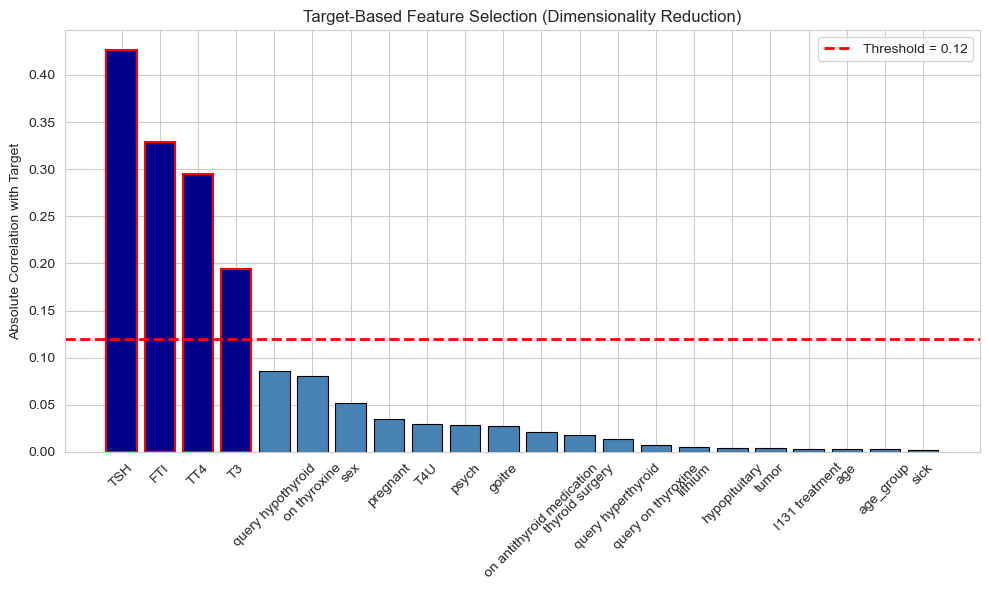

Features selected: 4 out of 22
Selected features: ['TSH', 'FTI', 'TT4', 'T3']


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Compute absolute correlation with target (this is "target similarity")
target_corr = X.corrwith(pd.Series(y, name='target')).abs()
target_corr_sorted = target_corr.sort_values(ascending=False)

# Decide threshold – paper uses roughly 0.1–0.15
threshold = 0.12   # you can adjust 0.10–0.15 to keep ~12–18 features

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(target_corr_sorted)), 
               target_corr_sorted.values, 
               color='steelblue', edgecolor='black', linewidth=0.8)

# Highlight selected features (above threshold)
selected_idx = target_corr_sorted[target_corr_sorted >= threshold].index
for i, feat in enumerate(target_corr_sorted.index):
    if feat in selected_idx:
        bars[i].set_color('darkblue')
        bars[i].set_edgecolor('red')
        bars[i].set_linewidth(1.5)

# Red horizontal line for threshold
plt.axhline(threshold, color='red', linestyle='--', linewidth=2, 
            label=f'Threshold = {threshold}')

plt.xticks(range(len(target_corr_sorted)), target_corr_sorted.index, rotation=45)
plt.ylabel('Absolute Correlation with Target')
plt.title('Target-Based Feature Selection (Dimensionality Reduction)')
plt.legend()
plt.tight_layout()
plt.savefig('target_based_dimension_reduction.png', dpi=300, bbox_inches='tight')
plt.show()

# Print how many features selected
print(f"Features selected: {sum(target_corr_sorted >= threshold)} out of {len(target_corr_sorted)}")
print("Selected features:", target_corr_sorted[target_corr_sorted >= threshold].index.tolist())